# Usage of this notebook
Sole purpose of this notebooks is to show methods and functions useful for loading the data in mne

In [1]:
import data_processing as dp

In [2]:
print(mne.__version__)

1.7.0


In [19]:
import os

# Specify the directory path
dir_path = './dane'
# List to store file paths
file_paths = dp.get_file_paths(dir_path)

print(file_paths)


['./dane/EEG_ExperimentBlock.DECEITFUL_RESPONSE_TO_FAKE_IDENTITY_raw.fif', './dane/EEG_ExperimentBlock.HONEST_RESPONSE_TO_FAKE_IDENTITY_raw.fif', './dane/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif', './dane/EEG_ExperimentBlock.DECEITFUL_RESPONSE_TO_TRUE_IDENTITY_raw.fif']


In [20]:
import mne
# Load the raw data
data_raw_file = file_paths[1]
raw = mne.io.read_raw_fif(data_raw_file, preload=True)
raw.load_data() 

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,"16 EEG, 3 misc, 1 Stimulus, 1 System status channel information (Triux systems)"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [21]:
channels = raw.ch_names
channels

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'T3',
 'T4',
 'T5',
 'T6',
 'F7',
 'F8',
 'Accel_x',
 'Accel_y',
 'Accel_z',
 'Digital',
 'Sample']

Kanał stymulacyjny to kanał, który nie odbiera sygnałów z EEG, MEG lub innego czujnika. Zamiast tego kanały STIM rejestrują napięcia (zwykle krótkie, prostokątne impulsy prądu stałego o stałej wielkości wysyłane z komputera sterującego eksperymentem), które są powiązane czasowo ze zdarzeniami eksperymentalnymi, takimi jak początek bodźca lub reakcja na naciśnięcie przycisku przez badanego (impulsy te są czasami nazywane impulsami TTL, impulsami zdarzeń, sygnałami wyzwalającymi lub po prostu „wyzwalaczami”). W innych przypadkach impulsy te mogą nie być ściśle powiązane czasowo ze zdarzeniem eksperymentalnym, ale zamiast tego mogą występować między próbami, aby wskazać rodzaj bodźca (lub warunku eksperymentalnego), który ma wystąpić w nadchodzącej próbie.


In [22]:
# .pick(picks='all'): Selects all channels from the copied raw object.
# .plot(start=1, duration=14): Plots the data from the selected channels. The plot method visualizes the data as a time series. 
# start=1 parameter indicates that the plot should start at 1 second into the recording, and duration=14 specifies that the plot should cover a duration of 14 seconds.
raw.copy().pick(picks='all').plot(start=1, duration=14);

In [23]:
raw

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,"16 EEG, 3 misc, 1 Stimulus, 1 System status channel information (Triux systems)"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [24]:
raw.crop(tmax=14)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,"16 EEG, 3 misc, 1 Stimulus, 1 System status channel information (Triux systems)"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


/home/grzesiek/miniconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


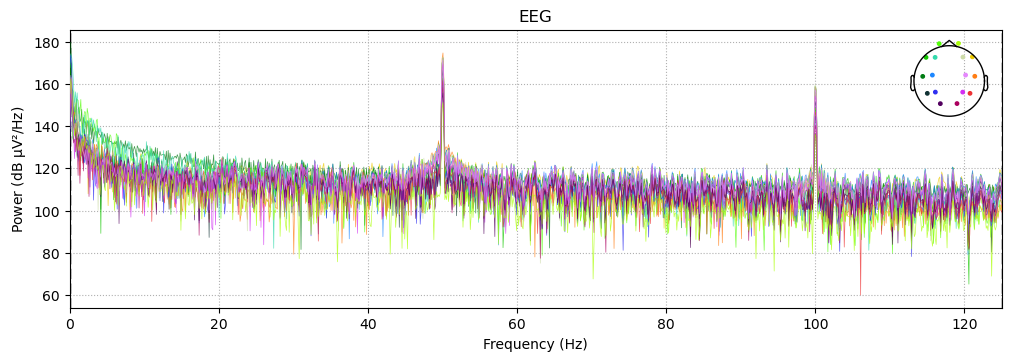

In [25]:
# raw.compute_psd(fmax=125): This method computes the power spectral density of the raw data. 
# The PSD is a measure of the power of the signal at different frequencies. 
# The fmax=125 parameter specifies the maximum frequency to consider in the computation. 
raw.compute_psd(fmax=125).plot()

In [26]:
channels

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'T3',
 'T4',
 'T5',
 'T6',
 'F7',
 'F8',
 'Accel_x',
 'Accel_y',
 'Accel_z',
 'Digital',
 'Sample']

In [27]:
# raw.times is a 1-dimensional NumPy array where each element represents the time (in seconds)
# corresponding to the start of a sample in the raw data. The length of this array is equal to the number of samples in the raw data.
raw.times

array([0.0000e+00, 4.0000e-03, 8.0000e-03, ..., 1.3992e+01, 1.3996e+01,
       1.4000e+01])

In [28]:
# raw.n_times is an integer that indicates the total number of time points in the raw data. 
# Each time point corresponds to a sample in the recording.
raw.n_times

3501

In [29]:
duration = raw.times[-1] - raw.times[0]
sampling_frequency = raw.n_times / duration

duration, sampling_frequency

(14.0, 250.07142857142858)

In [30]:
# Conversion to microvolts
raw.apply_function(fun=lambda x: x * 10**-6)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,"16 EEG, 3 misc, 1 Stimulus, 1 System status channel information (Triux systems)"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [31]:
# The filter method modifies the raw object to contain only the frequency components within the specified range (1 Hz to 35 Hz). 
# This is useful for removing noise and artifacts outside of the frequency range of interest, such as low-frequency drifts and high-frequency noise.
raw.filter(l_freq=1, h_freq=35)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,"16 EEG, 3 misc, 1 Stimulus, 1 System status channel information (Triux systems)"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,35.00 Hz


In [32]:
channels

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'T3',
 'T4',
 'T5',
 'T6',
 'F7',
 'F8',
 'Accel_x',
 'Accel_y',
 'Accel_z',
 'Digital',
 'Sample']

In [33]:
raw.pick(channels)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,"16 EEG, 3 misc, 1 Stimulus, 1 System status channel information (Triux systems)"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,35.00 Hz


In [34]:
raw.plot()

Independent Component Analysis is a signal processing method to separate independent sources linearly mixed in several sensors. 
A first step in many ICA algorithms is to whiten (or sphere) the data. This means that we remove any correlations in the data, i.e. the different channels (matrix Q) are forced to be uncorrelated.


1. Independent Component Analysis (ICA) is a signal processing method to separate independent sources linearly mixed in multiple sensors.
2. Whitening is a preprocessing step in ICA that removes correlations in the data, forcing different channels to be uncorrelated.
3. ICA algorithms rotate the whitened data to recover the original sources, which are statistically independent.
4. ICA can be applied to an arbitrary high number of dimensions, such as 128 EEG electrodes, to minimize the Gaussianity of the projection on all axes.
5. The weight matrix in ICA is the full transformation from the original space to the space found by ICA, and the rows of W are the vectors with which to compute the activity of one independent component.
6. ICA components can be used to estimate the equivalent dipole location for a component, assuming it is not an artifact.

In [42]:
#  ICA is a computational method for separating a multivariate signal into independent non-Gaussian signals. 
ica = mne.preprocessing.ICA(n_components=len(channels) - 1, random_state=1)

In [43]:
num_channels = len(raw.pick_types(eeg=True, meg=True).ch_names)
ica.n_components = min(ica.n_components, num_channels)

ica.fit(raw)

Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,86 iterations on raw data (3501 samples)
ICA components,16
Available PCA components,16
Channel types,eeg
ICA components marked for exclusion,—


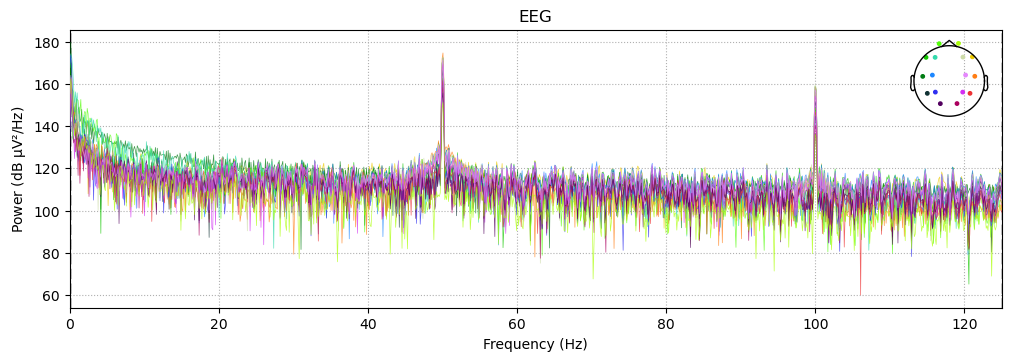

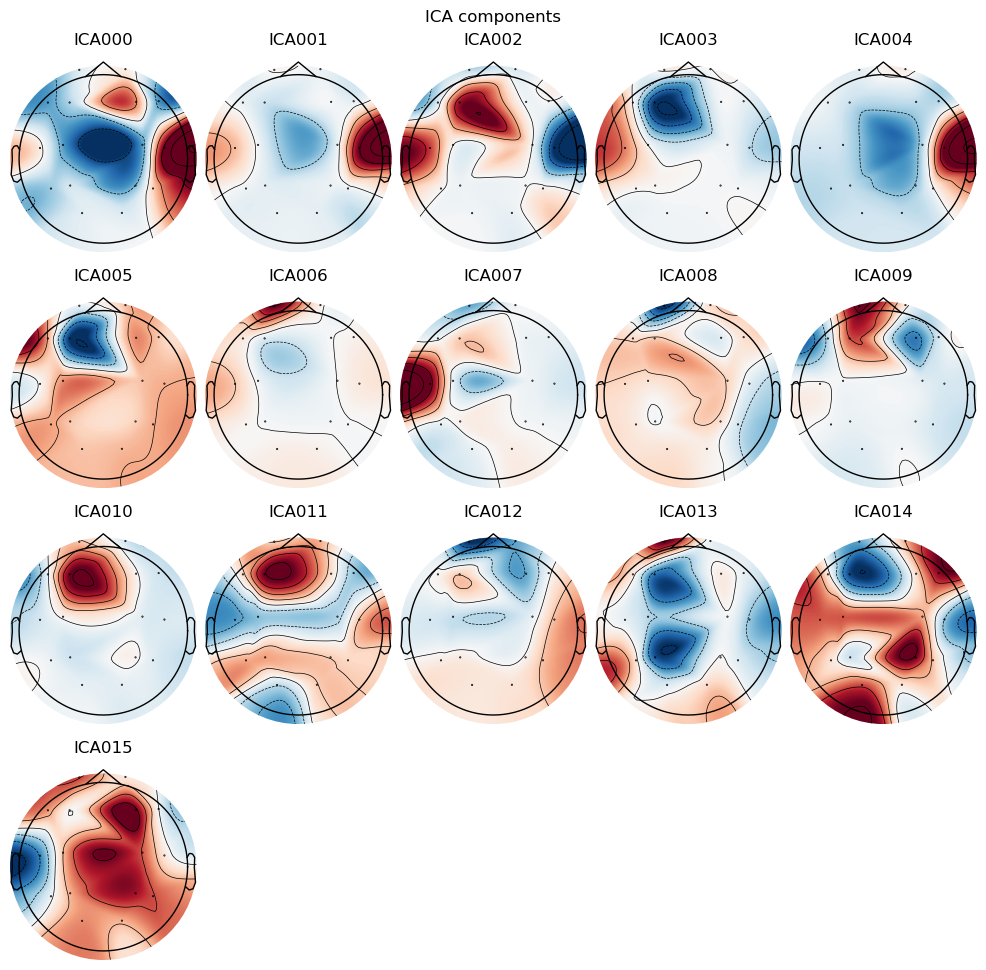

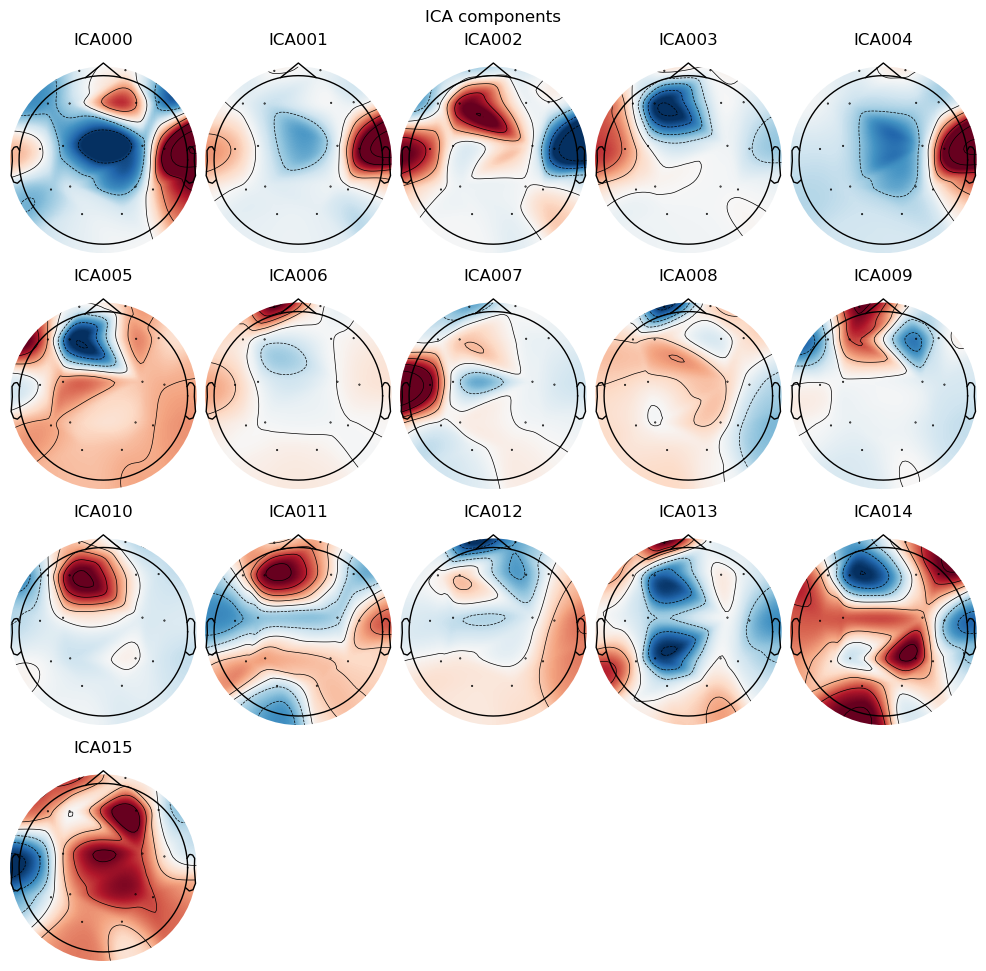

In [44]:
# Visualizing the independent components estimated by the ICA model. 
# It plots the spatial distribution of the components on the scalp, using the head outline for reference.
# This helps in identifying which components might correspond to specific brain regions or artifacts.

ica.plot_components(outlines="head")

In [45]:
# using the apply method of the ICA object to reconstruct the raw data from the independent components,
# excluding any components identified as artifacts (specified in ica.exclude). 

ica.apply(raw.copy(), exclude=ica.exclude).plot()

In [46]:
# Plot the source time course of the bad components
ica.plot_sources(raw, show_scrollbars=True)
# This method plots the time courses of the ICA sources (components).

In [ ]:
# mne.events_from_annotations(raw): This function scans the annotations in the raw object and converts them into a format suitable for event-related analyses.
# events: A 2D NumPy array where each row represents an event. The first column contains the event times (in seconds), and the second column contains the event IDs.
# event_dict: A dictionary mapping event IDs to event names. This is useful for interpreting the event IDs in the events array.

events, event_dict = mne.events_from_annotations(raw)

Used Annotations descriptions: ['ParticipantResponse.NO', 'ParticipantResponse.TIMEOUT', 'ParticipantResponse.YES', 'PersonalDataField.FATHERS_NAME: PersonalDataType.CELEBRITY', 'PersonalDataField.FATHERS_NAME: PersonalDataType.RANDO', 'PersonalDataField.MOTHERS_NAME: PersonalDataType.CELEBRITY', 'PersonalDataField.MOTHERS_NAME: PersonalDataType.FAKE', 'PersonalDataField.NAME: PersonalDataType.CELEBRITY']


An event array in MNE is a NumPy array with three columns:

* Sample: The sample number at which the event occurred. This is relative to the start of the continuous data recording.
* Event ID: A unique identifier for each type of event. This allows you to distinguish between different types of events, such as the onset of a visual stimulus versus the onset of an auditory stimulus.
* Offset: The offset in samples from the event sample. This is typically 0 for most applications, but it can be used to mark the end of an event or to specify additional information about the event.

In [ ]:
events

array([[ 150,    0,    5],
       [ 336,    0,    1],
       [ 841,    0,    4],
       [1048,    0,    3],
       [1550,    0,    7],
       [1801,    0,    2],
       [2335,    0,    8],
       [2497,    0,    3],
       [2966,    0,    6],
       [3220,    0,    2]])

In [ ]:
event_dict

{'ParticipantResponse.NO': 1,
 'ParticipantResponse.TIMEOUT': 2,
 'ParticipantResponse.YES': 3,
 'PersonalDataField.FATHERS_NAME: PersonalDataType.CELEBRITY': 4,
 'PersonalDataField.FATHERS_NAME: PersonalDataType.RANDO': 5,
 'PersonalDataField.MOTHERS_NAME: PersonalDataType.CELEBRITY': 6,
 'PersonalDataField.MOTHERS_NAME: PersonalDataType.FAKE': 7,
 'PersonalDataField.NAME: PersonalDataType.CELEBRITY': 8}

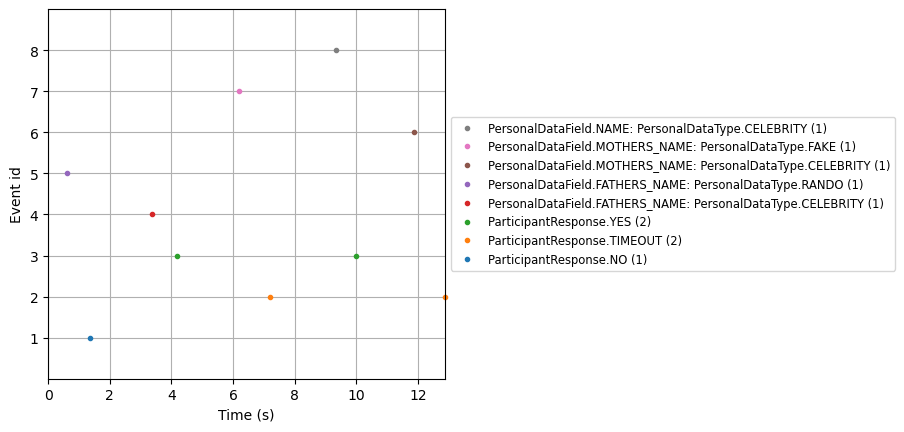

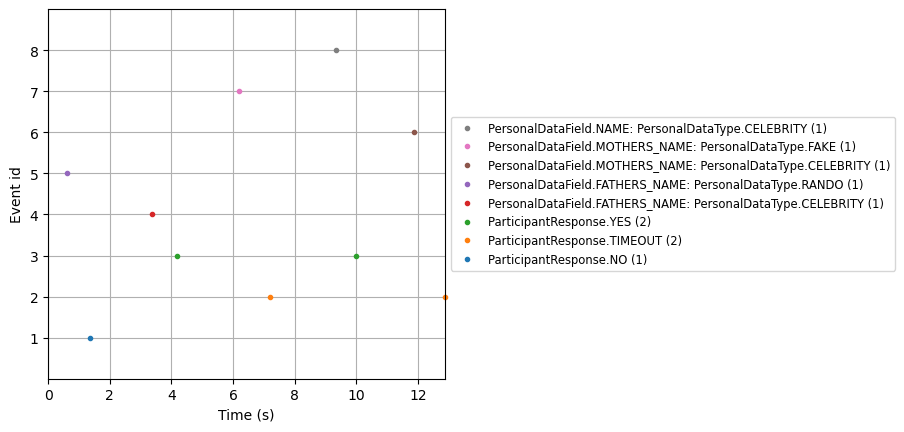

In [ ]:
mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info["sfreq"])

In [ ]:
#  preparing the data for event-related analyses by dividing the continuous raw data into epochs around specific events,
#  making it easier to study the neural activity associated with those events.

epochs = mne.Epochs(raw, events, event_id=event_dict) 
epochs

Not setting metadata
10 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,10
Events,ParticipantResponse.NO: 1ParticipantResponse.TIMEOUT: 2ParticipantResponse.YES: 2PersonalDataField.FATHERS_NAME: PersonalDataType.CELEBRITY: 1PersonalDataField.FATHERS_NAME: PersonalDataType.RANDO: 1PersonalDataField.MOTHERS_NAME: PersonalDataType.CELEBRITY: 1PersonalDataField.MOTHERS_NAME: PersonalDataType.FAKE: 1PersonalDataField.NAME: PersonalDataType.CELEBRITY: 1
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


In [ ]:
epochs["ParticipantResponse.NO"]

Number of events,1
Events,ParticipantResponse.NO: 1
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


Using data from preloaded Raw for 10 events and 176 original time points ...
0 bad epochs dropped
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


combining channels using GFP (eeg channels)


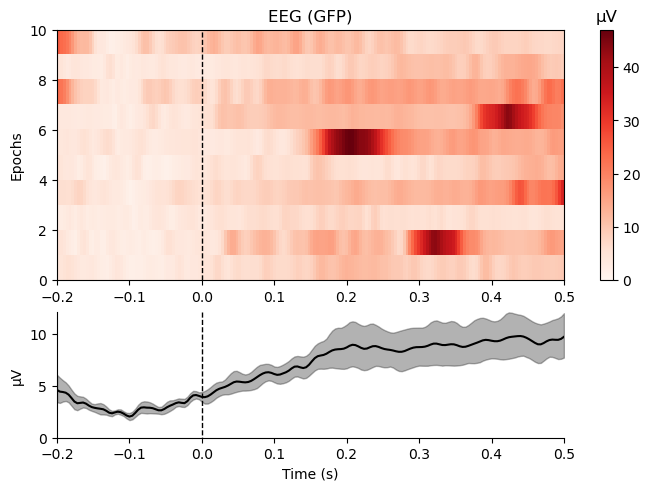

[<Figure size 640x480 with 3 Axes>]

In [ ]:
epochs.plot_image()

combining channels using GFP (eeg channels)


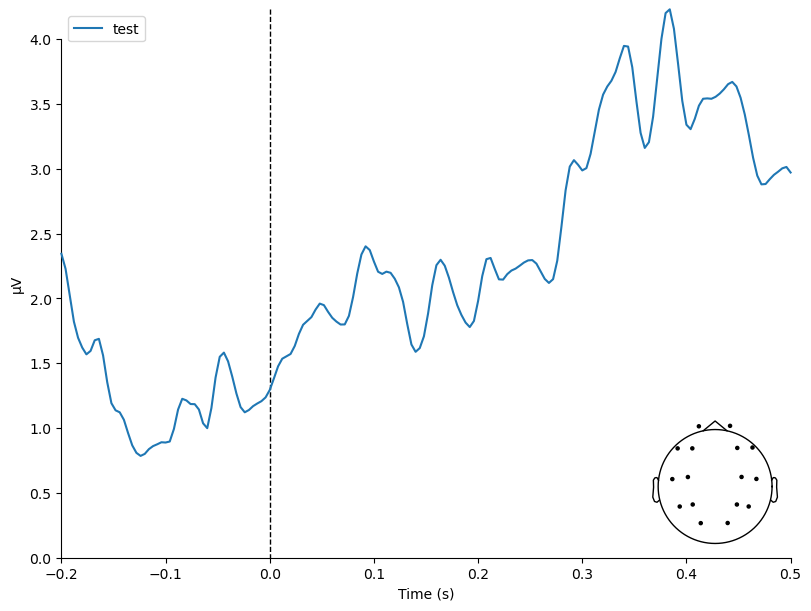

In [ ]:
evoked = epochs.average()
mne.viz.plot_compare_evokeds({"test": evoked}, show_sensors="lower right");

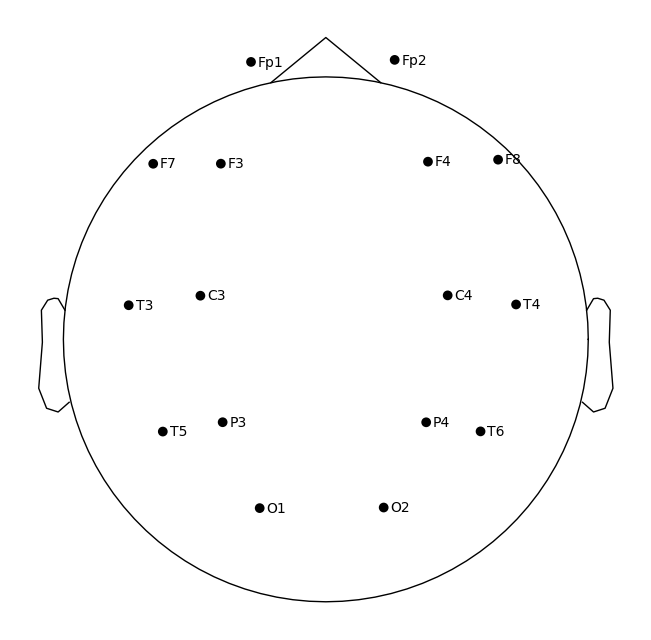

In [ ]:
raw.plot_sensors(show_names=True);